# Примеры к лекции 7.  Дискретное преобразование Фурье (ДПФ).
Лекции по курсу "Дискретные преобразования сигналов", 3 курс ФРКТ МФТИ 

In [1]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
from scipy.linalg import dft

In [2]:
# Если используете Jupyter, то можно поменять backend matplotlib на notebook
# %matplotlib notebook
# Для использования backend matplotlib widget, раскомментируйте строку ниже.
# %matplotlib widget
# Для использования backend matplotlib inline, раскомментируйте строку ниже.
%matplotlib inline


## Задание последовательности отсчетов

Зададим последовательность из 10 единичных импульсов $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

In [3]:
w = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
w

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Сделаем тоже самое с помощью функции `ones`

In [4]:
w1=np.ones(10)
w1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Выведем график последовательности $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

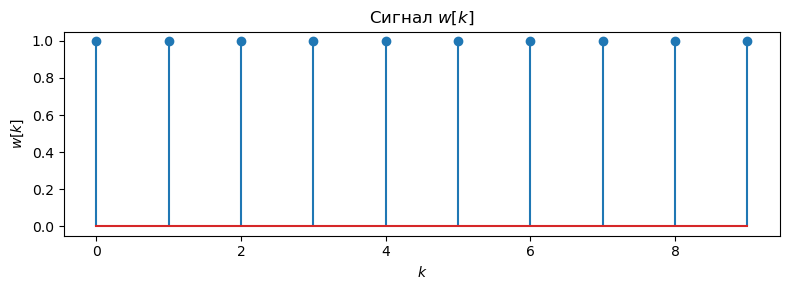

In [5]:
N=len(w)
k = np.arange(N)
plt.figure(figsize=[8, 3])
plt.stem(k, w)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

Определим последовательность вида $y[k]=\exp(j2\pi \nu_0 k) w[k]$

In [6]:
k = np.arange(N)
nu_0 = 0.25
y=np.exp(1j*2*np.pi*nu_0*k)
y

array([ 1.0000000e+00+0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
       -1.0000000e+00+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j,
        1.0000000e+00-2.4492936e-16j,  3.0616170e-16+1.0000000e+00j,
       -1.0000000e+00+3.6739404e-16j, -4.2862638e-16-1.0000000e+00j,
        1.0000000e+00-4.8985872e-16j,  5.5109106e-16+1.0000000e+00j])

Определим дискретную линейную свертку (Convolution) последовательности $w[k]$ c точно такой же последовательностью.

In [7]:
w2=signal.convolve(w, w)
w2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1])

Выведем график для такой последовательности:

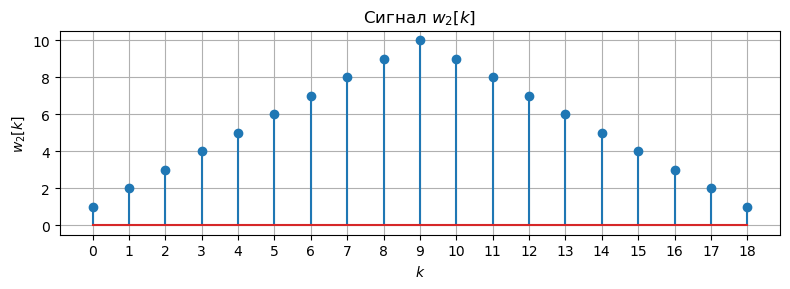

In [8]:
N=len(w2)
k = np.arange(0, N)
plt.figure(figsize=[8, 3])
plt.stem(k, w2)
plt.title('Сигнал $w_2[k]$')
plt.xlabel('$k$')
plt.ylabel('$w_2[k]$')
plt.grid()
plt.xticks(k) # установить деления шкалы абсцисс для каждого отсчета
plt.tight_layout()

Поэлементное умножение задается оператором `*`

In [9]:
w2*w2

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100,  81,  64,  49,
        36,  25,  16,   9,   4,   1])

## Вычисление ДПФ

Вычислим ДПФ $N$-точечной последовательности

$$x[k]=\sin \left(2\pi \frac{2}{N}k\right)+\cos \left(2\pi \frac{3}{N}k\right),\;\;k=0,1,\dots ,N-1,\;\;N=8.$$

Формула прямого ДПФ в данном случае без нормирующего множителя $1/N$:
$$X[n]=\sum_{k=0}^{N-1} x[k]\exp \left(-j2\pi \frac{nk}{N}\right)$$
Сначала воспользуемся матричной формой ДПФ. Функция `scipy.linalg.dft(N)` возвращает матрицу ДПФ $[W]_N$ размера $N\times N$. 


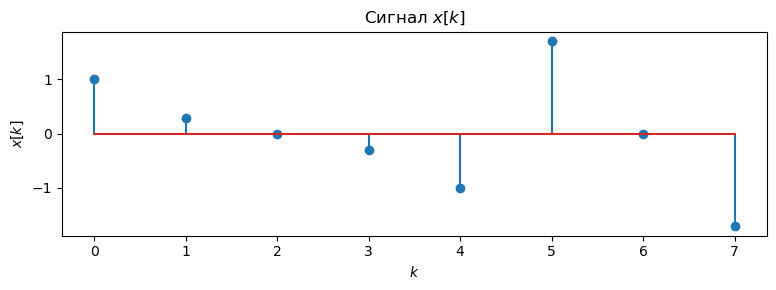

In [10]:
N=8
k=np.arange(N)
x=np.sin(2*np.pi*2/N*k)+np.cos(2*np.pi*3/N*k)

plt.figure(figsize=[8, 3])
plt.stem(k, x)
plt.title('Сигнал $x[k]$')
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.tight_layout()

In [11]:
W8 = dft(N)
Xn = W8 @ x
Xn

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        1.13832009e-16-4.00000000e+00j,  4.00000000e+00+2.22044605e-16j,
        1.33226763e-15+7.88860905e-31j,  4.00000000e+00+4.66293670e-15j,
       -5.01463715e-15+4.00000000e+00j,  0.00000000e+00-2.66453526e-15j])

Построим графики. 

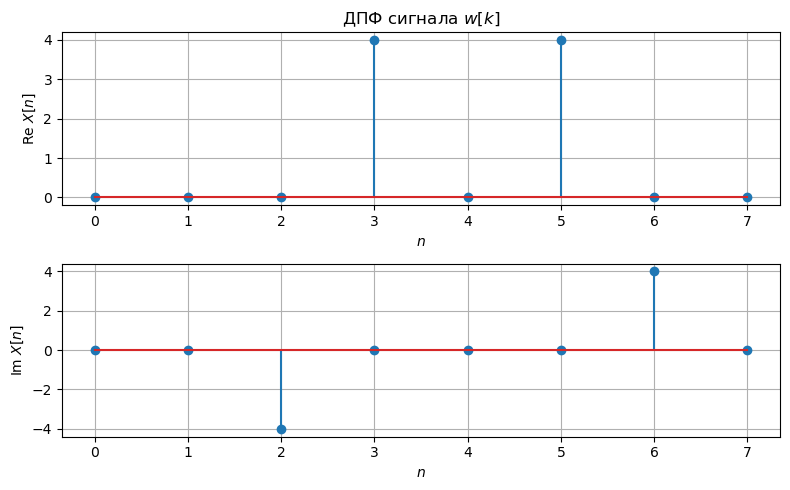

In [12]:
plt.figure(figsize=[8, 5])

n=np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, Xn.real)
plt.xticks(n)
plt.title('ДПФ сигнала $w[k]$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, Xn.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.grid()
plt.tight_layout()

Теперь проведем вычисление ДПФ по алгоритму быстрого преобразования Фурье (БПФ). Для этого воспользуемся функцией `np.fft.fft()`.


In [13]:
Xn1=np.fft.fft(x)
Xn1

array([-3.09256603e-17+0.00000000e+00j,  4.44089210e-16+9.15390196e-17j,
       -1.07929736e-15-4.00000000e+00j,  4.00000000e+00-1.86789586e-15j,
        1.30134197e-15+0.00000000e+00j,  4.00000000e+00+1.86789586e-15j,
       -1.07929736e-15+4.00000000e+00j,  4.44089210e-16-9.15390196e-17j])

Сравним результаты.

In [14]:
max(abs(Xn1-Xn))

4.034322756779725e-15

## Вычисление обратного ДПФ


Матрица обратного ДПФ может быть найдена как обратная матрица для $[W]_N$.

In [15]:
W8_inv1 = np.linalg.inv(W8)

Также ее можно получить с помощью транспонирования и комплексного сопряжения (эрмитова сопряжения) c дополнительной нормировкой на $N$, в силу того, что $[W]_N^{-1} =\frac{1}{N}{\left([W]_N^T \right)}^* =\frac{1}{N}[W]_N^*$. 


In [16]:
W8_inv2 = np.conjugate(W8) / N

Вычислим обратное ДПФ, используя матричную форму. Сравним результат с исходной последовательностью. 


In [17]:
x1 = W8_inv1 @ Xn
max(abs(x1-x))

7.901860134932568e-16

Выполним те же вычисления с использованием алгоритма БПФ. Для этого нам понадобится функция `np.fft.ifft()`

In [18]:
x2=np.fft.ifft(Xn)
max(abs(x2-x))

1.4861185472553567e-15

## Симметрия ДПФ для действительных последовательностей

In [23]:
N=64
x = np.random.rand(N)-0.5
Xn=np.fft.fft(x)

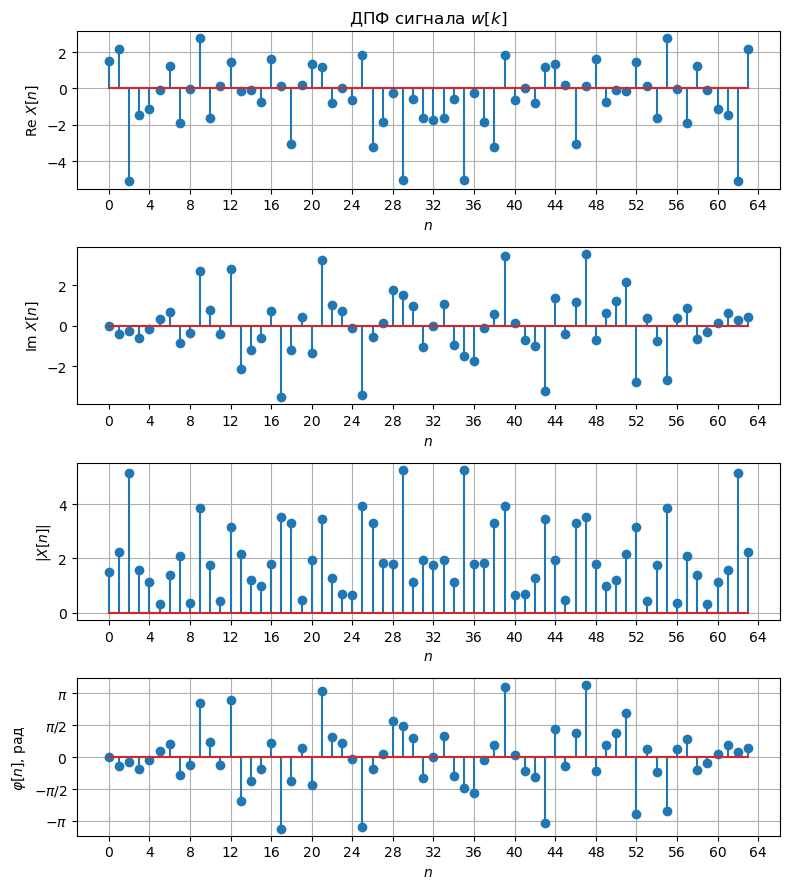

In [24]:
plt.figure(figsize=[8, 9])

n=np.arange(N)
n1=np.arange(N+1)
plt.subplot(4, 1, 1)
plt.stem(n, Xn.real)
plt.xticks(n1[::4])
plt.title('ДПФ сигнала $w[k]$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(4, 1, 2)
plt.stem(n, Xn.imag)
plt.xticks(n1[::4])
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.subplot(4, 1, 3)
plt.stem(n, abs(Xn))
plt.xticks(n1[::4])
plt.xlabel('$n$')
plt.ylabel('$|X[n]|$')
plt.grid()

plt.subplot(4, 1, 4)
plt.stem(n, Xn.imag)
plt.xticks(n1[::4])
plt.xlabel('$n$')
plt.ylabel('$\\varphi[n]$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))

plt.grid()
plt.tight_layout()